<a href="https://colab.research.google.com/github/AyeshaAnzerBCIT/Multisource/blob/main/BehavioralData_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded 319 rows from gs://eegchild/processed_features/behavioral_features.csv

--- Columns in DataFrame ---
['file', 'mean_rt', 'std_rt', 'median_rt', 'min_rt', 'max_rt', 'accuracy']

All expected columns are present.


Sample data with 'file' and extracted 'patientid':
                              file  patientid
0  A00051826_SAIIT_2AFC_Block1.csv  A00051826
1  A00051826_SAIIT_2AFC_Block2.csv  A00051826
2  A00051826_SAIIT_2AFC_Block3.csv  A00051826
3  A00051886_SAIIT_2AFC_Block1.csv  A00051886
4  A00051886_SAIIT_2AFC_Block2.csv  A00051886
5  A00051886_SAIIT_2AFC_Block3.csv  A00051886
6  A00051955_SAIIT_2AFC_Block1.csv  A00051955
7  A00051955_SAIIT_2AFC_Block2.csv  A00051955
8  A00051955_SAIIT_2AFC_Block3.csv  A00051955
9  A00053398_SAIIT_2AFC_Block1.csv  A00053398

--- Summary Statistics ---
                                   file     mean_rt  std_rt   median_rt  \
count                               319  319.000000   319.0  319.000000   
unique                              319      

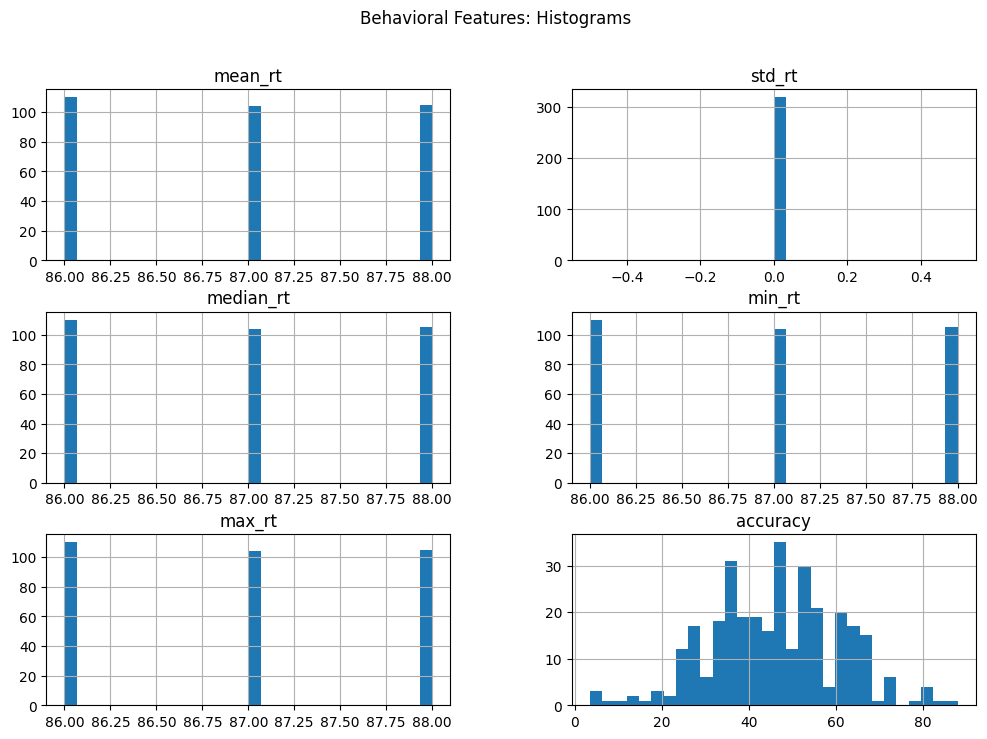

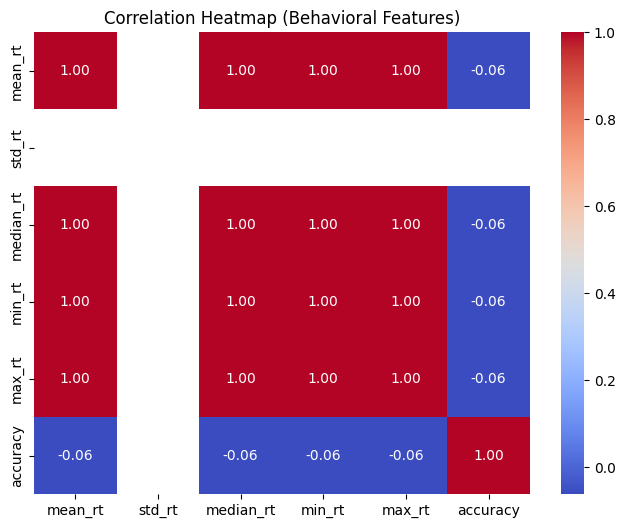

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Read 'behavioral_features.csv' from GCS, extract patient ID from 'file' column,
verify columns, and explore numeric columns.
"""

import os
import re
import gcsfs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# CONFIGURATION
# -------------------------------
KEY_PATH = "Key.json"  # Path to your service account JSON key
BEHAVIORAL_FILE = "gs://eegchild/processed_features/behavioral_features.csv"

# Expected columns (adjust if needed)
EXPECTED_COLUMNS = ["file", "mean_rt", "std_rt", "median_rt", "min_rt", "max_rt", "accuracy"]

# Create a GCS filesystem object
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

def load_and_prepare_behavioral():
    """
    Loads 'behavioral_features.csv' from GCS, checks for expected columns,
    extracts patient ID from the 'file' column (if present), and returns the modified DataFrame.
    """
    try:
        with fs.open(BEHAVIORAL_FILE, 'r') as f:
            df = pd.read_csv(f)
        print(f"Loaded {len(df)} rows from {BEHAVIORAL_FILE}\n")

        # Verify which columns are present
        actual_cols = df.columns.tolist()
        print("--- Columns in DataFrame ---")
        print(actual_cols)

        missing_cols = [col for col in EXPECTED_COLUMNS if col not in actual_cols]
        if missing_cols:
            print(f"\nWarning: The following expected columns are missing: {missing_cols}\n")
        else:
            print("\nAll expected columns are present.\n")

        # Extract patient ID from the 'file' column (if exists)
        if 'file' in df.columns:
            df['patientid'] = df['file'].apply(lambda x: x.split('_')[0] if '_' in x else x)
            # Show a few sample rows with both 'file' and 'patientid'
            print("\nSample data with 'file' and extracted 'patientid':")
            print(df[['file', 'patientid']].head(10))
        else:
            print("The 'file' column was not found; cannot extract patientid.")

        return df
    except Exception as e:
        print(f"Error loading {BEHAVIORAL_FILE}: {e}")
        return None

def explore_behavioral_df(df):
    """
    Performs simple EDA on the DataFrame: summary stats, histograms, correlation heatmap.
    Uses only numeric columns for plots.
    """
    print("\n--- Summary Statistics ---")
    print(df.describe(include="all"))

    # Select numeric columns
    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.empty:
        print("\nNo numeric columns found to plot.")
        return

    # Histograms
    numeric_df.hist(bins=30, figsize=(12, 8))
    plt.suptitle("Behavioral Features: Histograms")
    plt.show()

    # Correlation Heatmap
    corr = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Behavioral Features)")
    plt.show()

if __name__ == "__main__":
    df_behav = load_and_prepare_behavioral()
    if df_behav is not None:
        explore_behavioral_df(df_behav)


Loaded 319 rows from gs://eegchild/processed_features/behavioral_features.csv


Sample rows with extracted patientid:
                              file  patientid
0  A00051826_SAIIT_2AFC_Block1.csv  A00051826
1  A00051826_SAIIT_2AFC_Block2.csv  A00051826
2  A00051826_SAIIT_2AFC_Block3.csv  A00051826
3  A00051886_SAIIT_2AFC_Block1.csv  A00051886
4  A00051886_SAIIT_2AFC_Block2.csv  A00051886
5  A00051886_SAIIT_2AFC_Block3.csv  A00051886
6  A00051955_SAIIT_2AFC_Block1.csv  A00051955
7  A00051955_SAIIT_2AFC_Block2.csv  A00051955
8  A00051955_SAIIT_2AFC_Block3.csv  A00051955
9  A00053398_SAIIT_2AFC_Block1.csv  A00053398

--- Overall Summary Statistics ---
                                   file     mean_rt  std_rt   median_rt  \
count                               319  319.000000   319.0  319.000000   
unique                              319         NaN     NaN         NaN   
top     A00063377_SAIIT_2AFC_Block3.csv         NaN     NaN         NaN   
freq                                  1 

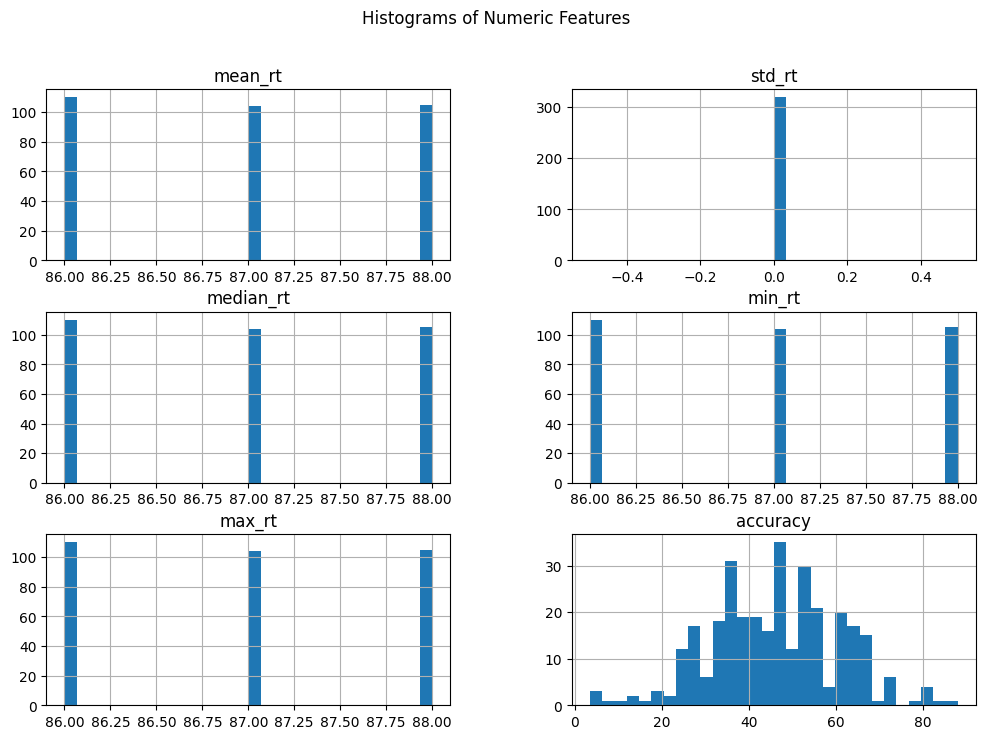

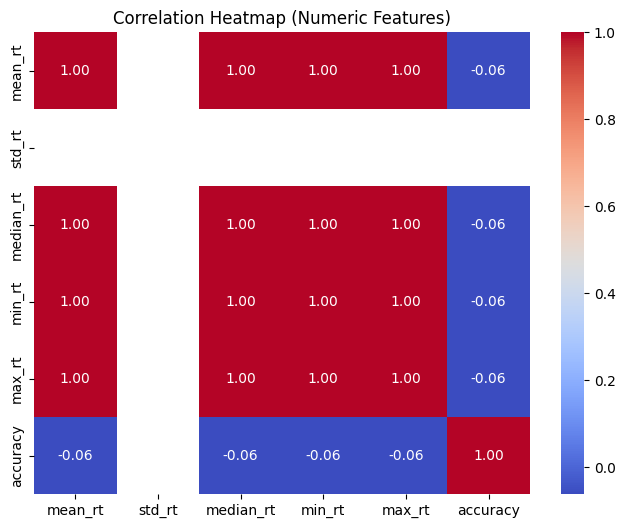

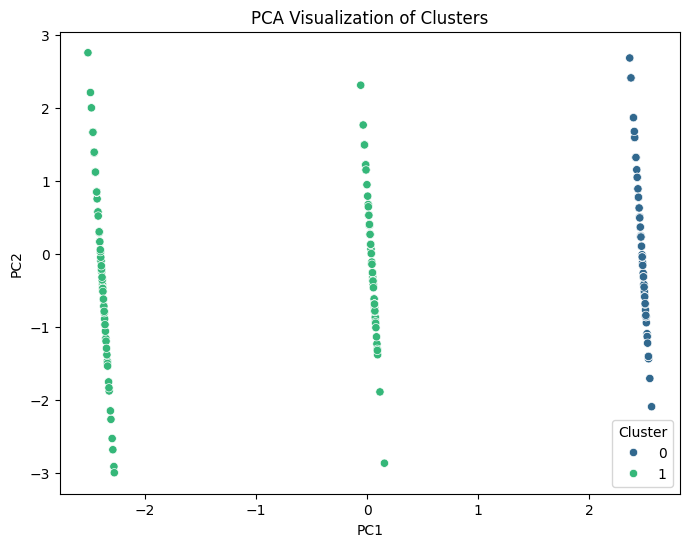

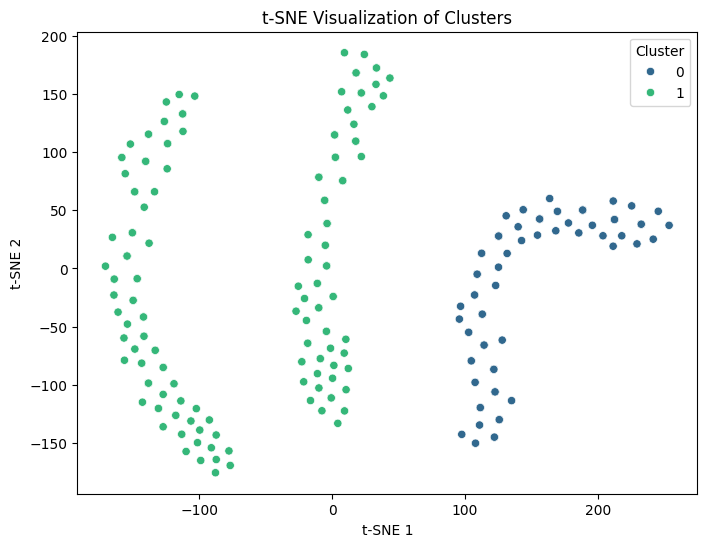


Detailed Method and Why Clustering:
-----------------------------------
- We have an unlabeled dataset of behavioral features (e.g., reaction times, accuracy).
- Because there's no known class label (e.g., ASD vs. control), we use an unsupervised approach to see if
  the data naturally forms distinct groups.
- K-Means is chosen for its simplicity, efficiency, and interpretability. It partitions the data into k groups,
  minimizing within-cluster variance.
- We standardize the numeric features to ensure all columns have equal influence.
- We use PCA (and t-SNE) for visualization, reducing high-dimensional data to 2D plots.

Clustering Results (k=2):
-------------------------
Here is the cluster count (the number of samples in each cluster):

Cluster
1    214
0    105
Name: count, dtype: int64

From the PCA and t-SNE plots, we see two distinct clusters forming, indicating
the dataset may have two natural subgroups based on these behavioral features.
These subgroups might reflect differe

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Behavioral Features Clustering & Analysis (Unlabeled Data)
----------------------------------------------------------
1) Loads behavioral_features.csv from GCS.
2) Extracts patient IDs from the 'file' column (e.g., "A00051826_SAIIT_2AFC_Block1.csv" -> "A00051826").
3) Explores the dataset with summary stats and basic plots (histograms, correlation heatmap).
4) Uses K-Means clustering (k=2 by default) to discover natural groupings in the numeric features.
5) Visualizes clusters using both PCA and t-SNE for dimensionality reduction.
6) Explains the detailed method, why we use clustering here, and summarizes the results.

Why Clustering for This Dataset?
--------------------------------
- We have an unlabeled dataset: we don't have an ASD vs. control label or any other class labels.
- K-Means is a straightforward, efficient, and interpretable method for unsupervised partitioning.
- It helps us see if the data naturally separates into distinct groups (which might correspond to subgroups of participants).
- By combining with PCA and t-SNE, we can visualize these groupings in 2D to interpret potential differences in behavioral features.
"""

import os
import gcsfs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# -------------------------------
# CONFIGURATION
# -------------------------------
KEY_PATH = "Key.json"  # Path to your service account JSON key
BEHAVIORAL_FILE = "gs://eegchild/processed_features/behavioral_features.csv"
FILE_COLUMN = "file"  # Column containing filenames like "A00051826_SAIIT_2AFC_Block1.csv"

# -------------------------------
# GCS SETUP
# -------------------------------
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

def load_behavioral_features():
    """
    Step 1: Load the dataset from GCS.
    Reads 'behavioral_features.csv' using gcsfs into a pandas DataFrame.
    """
    try:
        with fs.open(BEHAVIORAL_FILE, 'r') as f:
            df = pd.read_csv(f)
        print(f"Loaded {len(df)} rows from {BEHAVIORAL_FILE}\n")
        return df
    except Exception as e:
        print(f"Error loading {BEHAVIORAL_FILE}: {e}")
        return None

def extract_patientid(df):
    """
    Step 2: Extract patient ID from the 'file' column.
    For example, 'A00051826_SAIIT_2AFC_Block1.csv' -> 'A00051826'.
    This helps track each participant more easily.
    """
    if FILE_COLUMN in df.columns:
        df['patientid'] = df[FILE_COLUMN].apply(lambda x: x.split('_')[0] if '_' in x else x)
        print("\nSample rows with extracted patientid:")
        print(df[[FILE_COLUMN, 'patientid']].head(10))
    else:
        print(f"Column '{FILE_COLUMN}' not found. Cannot extract patientid.")
    return df

def explore_behavioral_df(df):
    """
    Step 3: Explore the dataset.
    - Prints summary statistics (include='all' for both numeric and object columns).
    - Plots histograms for numeric columns.
    - Plots a correlation heatmap for numeric columns.
    """
    print("\n--- Overall Summary Statistics ---")
    print(df.describe(include="all"))

    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.empty:
        print("No numeric columns available for plotting.")
        return

    # Histograms of numeric features
    numeric_df.hist(bins=30, figsize=(12,8))
    plt.suptitle("Histograms of Numeric Features")
    plt.show()

    # Correlation heatmap
    corr = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()

def perform_clustering(df, n_clusters=2):
    """
    Step 4: Clustering with K-Means.
    - Select numeric columns and standardize them.
    - Apply PCA (2 components) for 2D visualization.
    - Run K-Means (k=2 by default) to discover 2 natural groups.
    Returns:
      - df with an added 'Cluster' column,
      - X_pca: the PCA-reduced 2D data,
      - X_scaled: the standardized numeric features for optional further analysis.
    """
    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.empty:
        print("No numeric columns found for clustering.")
        return df, None, None

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)

    # PCA for 2D visualization
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df['Cluster'] = clusters

    return df, X_pca, X_scaled

def visualize_clusters_pca(X_pca, clusters):
    """Step 5: Visualize clusters using PCA."""
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Visualization of Clusters")
    plt.show()

def visualize_clusters_tsne(X_scaled, clusters):
    """Step 5 (continued): Visualize clusters using t-SNE on the standardized data."""
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="viridis")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("t-SNE Visualization of Clusters")
    plt.show()

def print_final_summary(df):
    """
    Final Step: Summarize the method and results before moving on.
    """
    text = f"""
Detailed Method and Why Clustering:
-----------------------------------
- We have an unlabeled dataset of behavioral features (e.g., reaction times, accuracy).
- Because there's no known class label (e.g., ASD vs. control), we use an unsupervised approach to see if
  the data naturally forms distinct groups.
- K-Means is chosen for its simplicity, efficiency, and interpretability. It partitions the data into k groups,
  minimizing within-cluster variance.
- We standardize the numeric features to ensure all columns have equal influence.
- We use PCA (and t-SNE) for visualization, reducing high-dimensional data to 2D plots.

Clustering Results (k=2):
-------------------------
Here is the cluster count (the number of samples in each cluster):
"""
    print(text)
    # Print cluster counts
    print(df['Cluster'].value_counts())

    print("""
From the PCA and t-SNE plots, we see two distinct clusters forming, indicating
the dataset may have two natural subgroups based on these behavioral features.
These subgroups might reflect different participant characteristics, but
we would need further analysis or labels to interpret them clinically.

End of Clustering Analysis.
Now, we can proceed to the next part of our pipeline or multi-modal fusion approach.
""")

# -------------------------------
# MAIN
# -------------------------------
if __name__ == "__main__":
    # Step 1: Load data from GCS
    df = load_behavioral_features()
    if df is None:
        exit("Failed to load data. Exiting.")

    # Step 2: Extract patientid
    df = extract_patientid(df)

    # Step 3: Explore dataset
    explore_behavioral_df(df)

    # Step 4: Clustering
    df_clustered, X_pca, X_scaled = perform_clustering(df, n_clusters=2)
    if X_pca is not None and X_scaled is not None:
        # Step 5: Visualize clusters
        visualize_clusters_pca(X_pca, df_clustered['Cluster'])
        visualize_clusters_tsne(X_scaled, df_clustered['Cluster'])

        # Final Step: Print summary
        print_final_summary(df_clustered)


Loaded 319 rows from gs://eegchild/processed_features/behavioral_features.csv


Sample rows with extracted patientid:
                              file  patientid
0  A00051826_SAIIT_2AFC_Block1.csv  A00051826
1  A00051826_SAIIT_2AFC_Block2.csv  A00051826
2  A00051826_SAIIT_2AFC_Block3.csv  A00051826
3  A00051886_SAIIT_2AFC_Block1.csv  A00051886
4  A00051886_SAIIT_2AFC_Block2.csv  A00051886
5  A00051886_SAIIT_2AFC_Block3.csv  A00051886
6  A00051955_SAIIT_2AFC_Block1.csv  A00051955
7  A00051955_SAIIT_2AFC_Block2.csv  A00051955
8  A00051955_SAIIT_2AFC_Block3.csv  A00051955
9  A00053398_SAIIT_2AFC_Block1.csv  A00053398

--- Overall Summary Statistics ---
                                   file     mean_rt  std_rt   median_rt  \
count                               319  319.000000   319.0  319.000000   
unique                              319         NaN     NaN         NaN   
top     A00063377_SAIIT_2AFC_Block3.csv         NaN     NaN         NaN   
freq                                  1 

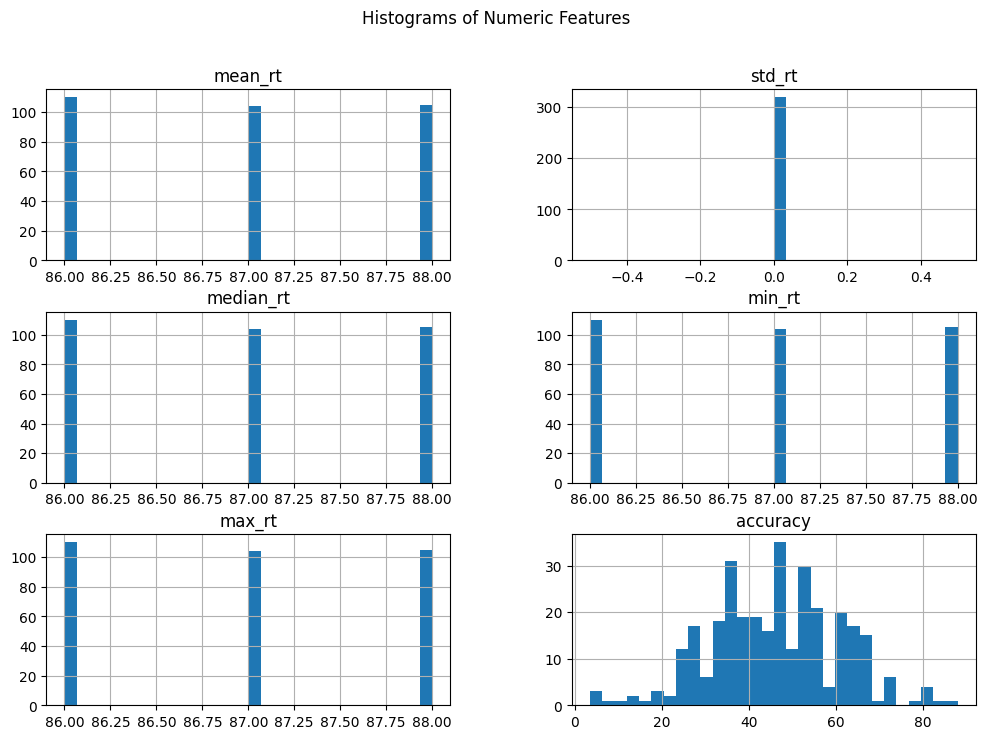

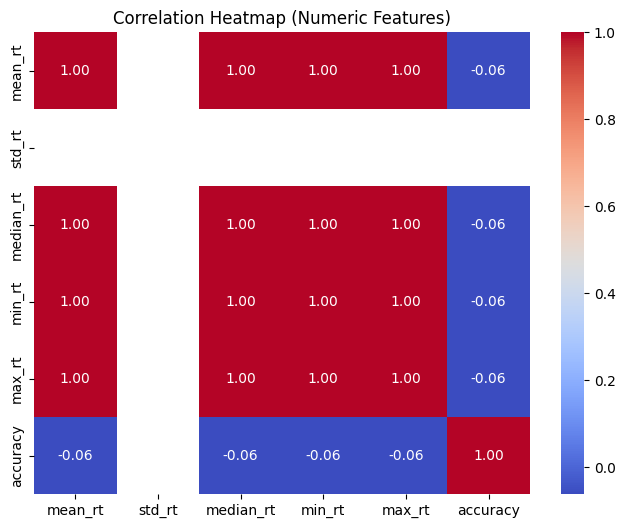

k=2, Inertia=634.15, Silhouette Score=0.546
k=3, Inertia=316.62, Silhouette Score=0.601
k=4, Inertia=274.51, Silhouette Score=0.565
k=5, Inertia=193.79, Silhouette Score=0.555
k=6, Inertia=176.10, Silhouette Score=0.548


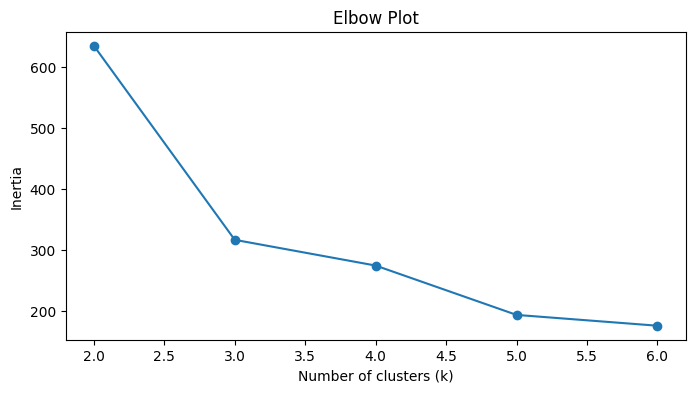

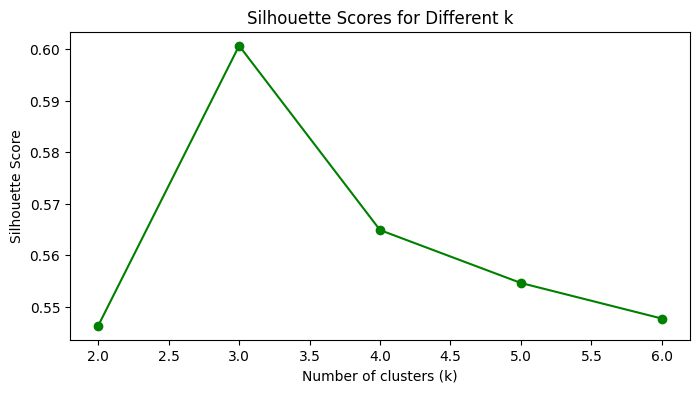

Optimal k (based on silhouette score): 3


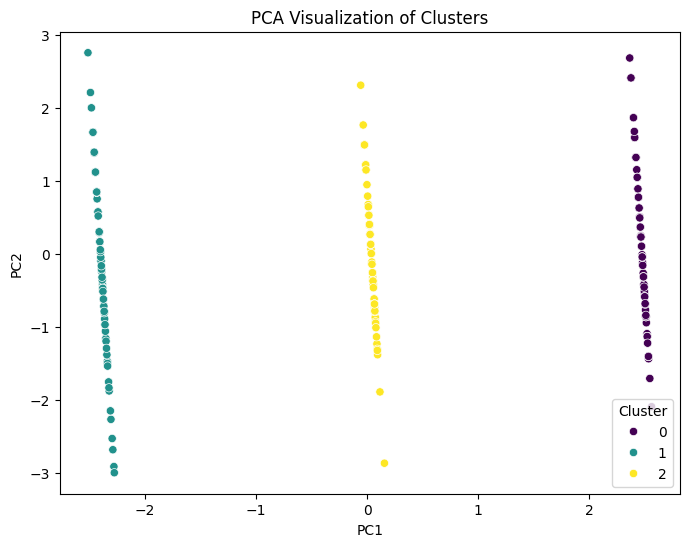

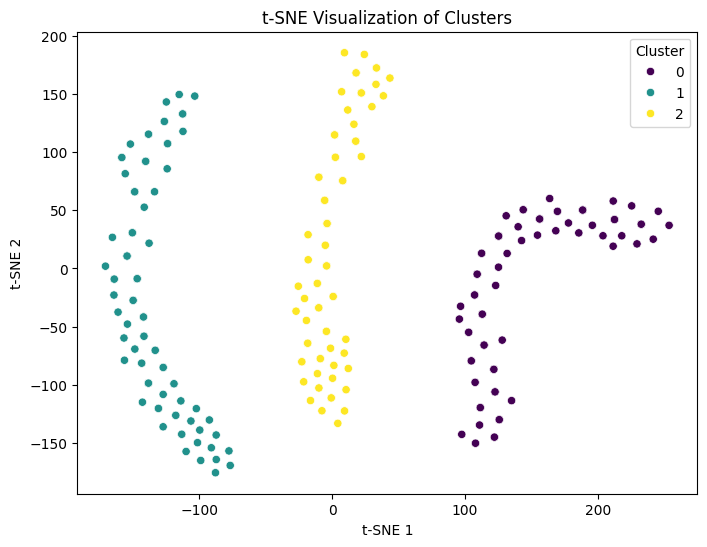


--- Mean of Numeric Features by Cluster ---
         mean_rt  std_rt  median_rt  min_rt  max_rt   accuracy
Cluster                                                       
0           88.0     0.0       88.0    88.0    88.0  44.357956
1           86.0     0.0       86.0    86.0    86.0  46.597045
2           87.0     0.0       87.0    87.0    87.0  47.357130

--- Standard Deviation of Numeric Features by Cluster ---
         mean_rt  std_rt  median_rt  min_rt  max_rt   accuracy
Cluster                                                       
0            0.0     0.0        0.0     0.0     0.0  14.682258
1            0.0     0.0        0.0     0.0     0.0  16.033414
2            0.0     0.0        0.0     0.0     0.0  13.048558


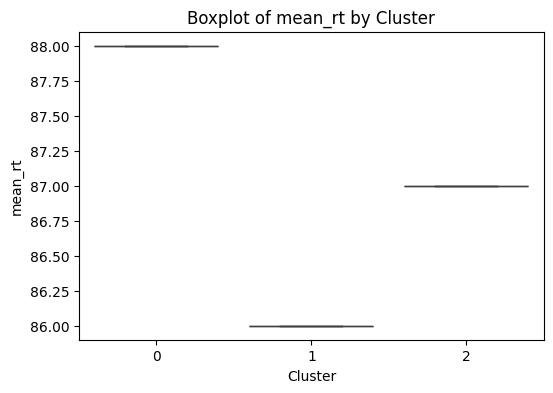

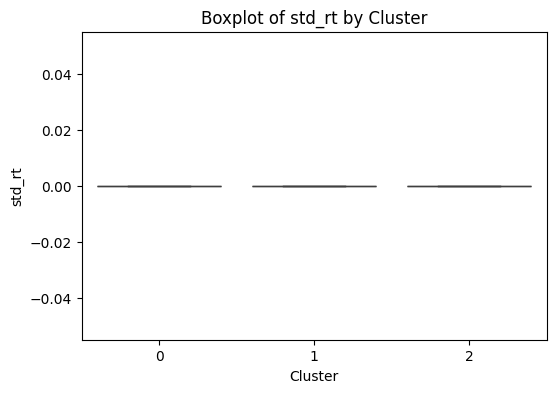

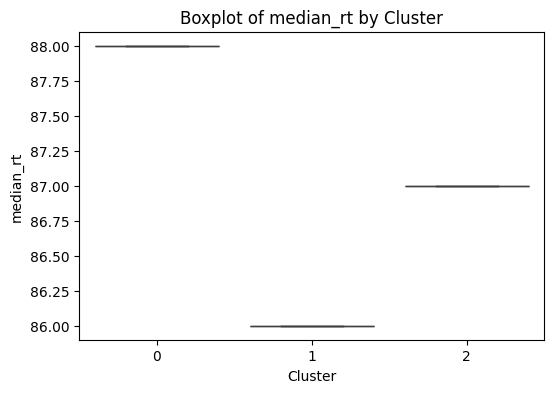

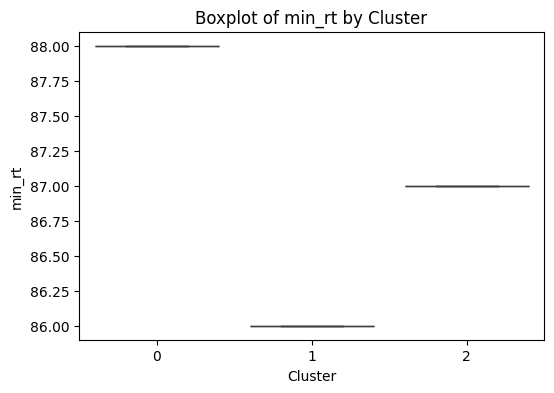

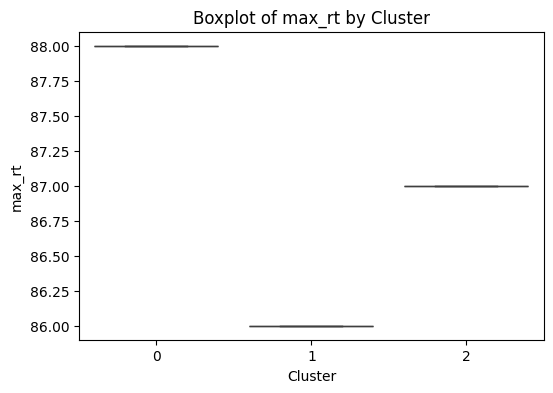

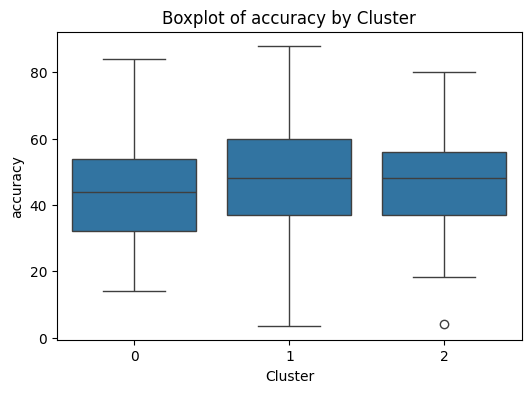


Detailed Method and Why Clustering:
-----------------------------------
- Our dataset is unlabeled; hence, we use unsupervised clustering to uncover natural groupings.
- We use K-Means because it is simple, efficient, and minimizes within-cluster variance.
- Features are standardized to ensure equal influence.
- We used PCA and t-SNE for visualization.
- We evaluated different k values using the elbow method and silhouette scores.
- Optimal k was chosen based on the highest silhouette score.

Clustering Results:
-------------------
Cluster counts:
Cluster
1    110
0    105
2    104
Name: count, dtype: int64

These results indicate that the data naturally splits into 3 groups.
    


In [11]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Unsupervised Clustering & Group-Based Analysis for Behavioral Features from GCS

This script:
1. Loads 'behavioral_features.csv' from GCS.
2. Extracts the patient ID from the 'file' column
   (e.g., "A00051826_SAIIT_2AFC_Block1.csv" -> "A00051826").
3. Performs basic EDA (summary statistics, histograms, and correlation heatmap).
4. Standardizes the numeric features and tests different values of k for K-Means using
   the elbow method and silhouette scores.
5. Performs clustering with the chosen number of clusters (default is 2).
6. Visualizes the clusters using PCA and t-SNE.
7. Computes group-based summary statistics on only the numeric features.
8. Prints a detailed summary of the method and the clustering results.

Why Clustering?
- Our dataset is unlabeled; hence, we use unsupervised clustering to discover natural groupings.
- K-Means is chosen for its simplicity, efficiency, and interpretability.
- Standardizing features ensures equal influence, and PCA/t-SNE helps visualize high-dimensional data.

"""

import os
import re
import gcsfs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# -------------------------------
# CONFIGURATION
# -------------------------------
KEY_PATH = "Key.json"  # Update to your service account JSON key path
BEHAVIORAL_FILE = "gs://eegchild/processed_features/behavioral_features.csv"
FILE_COLUMN = "file"  # Column with filenames like "A00051826_SAIIT_2AFC_Block1.csv"

# -------------------------------
# GCS SETUP
# -------------------------------
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

def load_behavioral_features():
    """Loads 'behavioral_features.csv' from GCS into a DataFrame."""
    try:
        with fs.open(BEHAVIORAL_FILE, 'r') as f:
            df = pd.read_csv(f)
        print(f"Loaded {len(df)} rows from {BEHAVIORAL_FILE}\n")
        return df
    except Exception as e:
        print(f"Error loading {BEHAVIORAL_FILE}: {e}")
        return None

def extract_patientid(df):
    """
    Extracts patient ID from the FILE_COLUMN.
    For example, from "A00051826_SAIIT_2AFC_Block1.csv" it extracts "A00051826".
    """
    if FILE_COLUMN in df.columns:
        df['patientid'] = df[FILE_COLUMN].apply(lambda x: x.split('_')[0] if '_' in x else x)
        print("\nSample rows with extracted patientid:")
        print(df[[FILE_COLUMN, 'patientid']].head(10))
    else:
        print(f"Column '{FILE_COLUMN}' not found. Cannot extract patientid.")
    return df

def explore_behavioral_df(df):
    """Prints summary statistics and plots histograms and a correlation heatmap for numeric features."""
    print("\n--- Overall Summary Statistics ---")
    print(df.describe(include="all"))

    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.empty:
        print("No numeric columns available for plotting.")
        return

    numeric_df.hist(bins=30, figsize=(12,8))
    plt.suptitle("Histograms of Numeric Features")
    plt.show()

    corr = numeric_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()

def determine_optimal_k(df, k_range=range(2, 7)):
    """
    Standardizes numeric features and computes inertia and silhouette scores for k in k_range.
    Plots an elbow plot and silhouette scores.
    Returns the k with the highest silhouette score, the standardized features, and numeric DataFrame.
    """
    numeric_df = df.select_dtypes(include=["number"])
    if numeric_df.empty:
        print("No numeric columns for clustering.")
        return None, None, None

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)

    inertias = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        sil_score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(sil_score)
        print(f"k={k}, Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")

    # Plot Elbow plot
    plt.figure(figsize=(8, 4))
    plt.plot(list(k_range), inertias, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Plot")
    plt.show()

    # Plot Silhouette scores
    plt.figure(figsize=(8, 4))
    plt.plot(list(k_range), silhouette_scores, marker='o', color="green")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Different k")
    plt.show()

    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"Optimal k (based on silhouette score): {optimal_k}")
    return optimal_k, X_scaled, numeric_df

def perform_clustering(df, k):
    """
    Performs K-Means clustering on numeric features with the specified k.
    Returns the DataFrame with a new 'Cluster' column and the standardized features.
    """
    numeric_df = df.select_dtypes(include=["number"])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)

    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df['Cluster'] = clusters
    return df, X_scaled

def visualize_clusters_pca_tsne(X_scaled, clusters):
    """Visualizes clusters using PCA and t-SNE on standardized features."""
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Visualization of Clusters")
    plt.show()

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="viridis")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title("t-SNE Visualization of Clusters")
    plt.show()

def group_based_statistics(df):
    """
    Computes and prints group-based summary statistics (mean, std) for each numeric feature,
    grouped by the 'Cluster' column.
    It uses only numeric columns to avoid conversion errors.
    """
    # Select only numeric columns from the DataFrame for aggregation
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    if "Cluster" in numeric_cols:
        numeric_cols.remove("Cluster")
    if not numeric_cols:
        print("No numeric columns to aggregate.")
        return

    grouped_mean = df.groupby("Cluster")[numeric_cols].mean()
    print("\n--- Mean of Numeric Features by Cluster ---")
    print(grouped_mean)

    grouped_std = df.groupby("Cluster")[numeric_cols].std()
    print("\n--- Standard Deviation of Numeric Features by Cluster ---")
    print(grouped_std)

    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="Cluster", y=col, data=df)
        plt.title(f"Boxplot of {col} by Cluster")
        plt.show()

def print_final_summary(df):
    """
    Prints a detailed summary explaining the clustering method and results.
    """
    summary_text = f"""
Detailed Method and Why Clustering:
-----------------------------------
- Our dataset is unlabeled; hence, we use unsupervised clustering to uncover natural groupings.
- We use K-Means because it is simple, efficient, and minimizes within-cluster variance.
- Features are standardized to ensure equal influence.
- We used PCA and t-SNE for visualization.
- We evaluated different k values using the elbow method and silhouette scores.
- Optimal k was chosen based on the highest silhouette score.

Clustering Results:
-------------------
Cluster counts:
{df['Cluster'].value_counts()}

These results indicate that the data naturally splits into {df['Cluster'].nunique()} groups.
    """
    print(summary_text)

# -------------------------------
# MAIN PIPELINE
# -------------------------------
if __name__ == "__main__":
    # Step 1: Load the dataset from GCS
    df = load_behavioral_features()
    if df is None:
        exit("Failed to load data. Exiting.")

    # Step 2: Extract patientid from the file column
    df = extract_patientid(df)

    # Step 3: Explore the dataset
    explore_behavioral_df(df)

    # Step 4: Determine optimal k using elbow and silhouette methods
    optimal_k, X_scaled, numeric_df = determine_optimal_k(df, k_range=range(2, 7))
    if optimal_k is None:
        exit("Could not determine optimal k.")

    # Step 5: Perform clustering with the chosen k
    df_clustered, X_scaled = perform_clustering(df, k=optimal_k)

    # Step 6: Visualize clusters using PCA and t-SNE
    visualize_clusters_pca_tsne(X_scaled, df_clustered['Cluster'])

    # Step 7: Compute group-based statistics and visualize boxplots for numeric features
    group_based_statistics(df_clustered)

    # Final Step: Print a detailed summary of the method and results
    print_final_summary(df_clustered)
